In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
from surprise import Reader

In [2]:
reviews = pd.read_csv('D:\\Workspace\\Data_Mining\\Restaurant_Recomendation_System\\data\\IL_review.csv', usecols= ['business_id', 'stars', 'review_id', 'user_id'])
business = pd.read_csv('D:\\Workspace\\Data_Mining\\Restaurant_Recomendation_System\\data\\business.csv', usecols= ['business_id', 'name'])
users = pd.read_csv('D:\\Workspace\\Data_Mining\\Restaurant_Recomendation_System\\data\\IL_users.csv', usecols= ['user_id', 'name'])

users = users.rename(columns = { 'name': 'Username' })
business = business.rename(columns = { 'name': 'Restaurant name' })

In [3]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars'], dtype='object')

In [4]:
business.head()

,business_id,Restaurant name
0,ljxNT9p0y7YMPx0fcNBGig,Tony's Restaurant & 3rd Street Cafe
1,EuRGgOwJ0g1vTj2R04j37Q,Crafty Crab
2,uYBx50Yl_Jc-UYwFzudBsQ,Chew Doin Fried Chicken & Ramen
3,zjQDk4tZyhEroyqtkgvx0g,The Cobblestone Eatery and Drinkery
4,gI34hM-873fwF1XQ8hOaSg,Joe’s Pizza and Pasta


In [5]:
users.columns

Index(['user_id', 'Username'], dtype='object')

In [6]:
reviews.head()

,review_id,user_id,business_id,stars
0,Ad91EzbAGRCR1SwkPfZJKg,LWTvg7RlyNLXIf482tXBPw,WCVFqK84i2H5EClSoow7ZA,5.0
1,uGJubhANtj6sfP_xz8LeLQ,1EecTw-Iojid62ySMMl5gA,xR3inMR2KceU3b9dhkz_tw,4.0
2,xqp0pnO0PfBkaFRNaVImYw,c35f8FumQy5045zFbIir6w,_uyLoz0BbrQIVmUEm_td1Q,3.0
3,91uC4f0aX4ycQTDL5Hq7Mw,huHPQSQgw4kFakc0Vq7TDA,_D7QoWuQKMXk0mEE7r_Ftw,5.0
4,GVoXS_AdNzSUbyNcoErdZQ,rqYkeGG9PBAdMRDvTMCmfw,MVmJuns9ZD9QLGltc0Am8g,5.0


In [3]:
ratings_data = reviews.join(business.set_index('business_id'), on='business_id')
ratings_data = ratings_data.join(users.set_index('user_id'), on = 'user_id')
ratings_data.head()

,review_id,user_id,business_id,stars,Restaurant name,Username
0,Ad91EzbAGRCR1SwkPfZJKg,LWTvg7RlyNLXIf482tXBPw,WCVFqK84i2H5EClSoow7ZA,5.0,Itty-Bitty,Cheryl
1,uGJubhANtj6sfP_xz8LeLQ,1EecTw-Iojid62ySMMl5gA,xR3inMR2KceU3b9dhkz_tw,4.0,Lascelles Granite City,Brandi
2,xqp0pnO0PfBkaFRNaVImYw,c35f8FumQy5045zFbIir6w,_uyLoz0BbrQIVmUEm_td1Q,3.0,Jimmy The Greek's,Judy
3,91uC4f0aX4ycQTDL5Hq7Mw,huHPQSQgw4kFakc0Vq7TDA,_D7QoWuQKMXk0mEE7r_Ftw,5.0,Chateau La VIn,Tina
4,GVoXS_AdNzSUbyNcoErdZQ,rqYkeGG9PBAdMRDvTMCmfw,MVmJuns9ZD9QLGltc0Am8g,5.0,Triple R's Smokehouse,Kim


In [4]:
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(ratings_data[['user_id', 'business_id', 'stars']], reader)

anti_set = data.build_full_trainset().build_anti_testset()

In [5]:
business = business.drop_duplicates(['business_id' , 'Restaurant name'])
users = users.drop_duplicates(['user_id' , 'Username'])

In [6]:
kf = KFold(n_splits=3)
algo = KNNBasic()
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_pred = predictions

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.5072
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.5160
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.5048


In [7]:
kf = KFold(n_splits=5)
sim_options = {'name':'cosine'}
algo = KNNWithMeans(sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_rmse= rmse
        best_pred = predictions
print(best_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4877
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.5221
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.5042
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.5206
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.5082
1.4876919834837181


In [8]:
kf = KFold(n_splits=3)
algo = KNNBaseline(k=3)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse = rmse
        best_algo = algo
        best_pred = predictions

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4220
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4184
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4241


In [9]:
sim_options = { 'name': 'cosine' ,'user_based':  False}
kf = KFold(n_splits=5)
algo = KNNWithMeans(k =3 , sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_rmse= rmse
        best_algo = algo
        best_pred = predictions
    

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4705
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4611
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4659
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4956
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4751


In [10]:
pred_df = pd.DataFrame(best_pred).merge(ratings_data , left_on = ['uid', 'iid'], right_on = ['user_id', 'business_id'])
pred_df[['uid', 'iid',  'Username', 'user_id', 'Restaurant name', 'business_id', 'est','stars']]

,uid,iid,Username,user_id,Restaurant name,business_id,est,stars
0,bYENop4BuQepBjM1-BI3fA,L7lfEUSASzGPtknR-peg3g,Steven,bYENop4BuQepBjM1-BI3fA,Shake Rattle & Roll Drive In,L7lfEUSASzGPtknR-peg3g,5.000000,5.0
1,Jqi2O_-6tC8RpCg53zWeNw,deUx2fJFlvIvYQAgFIyZdQ,Tom,Jqi2O_-6tC8RpCg53zWeNw,BEAST Southern Kitchen & BBQ,deUx2fJFlvIvYQAgFIyZdQ,5.000000,3.0
2,32FczObEmtAJUDo6hvIaUw,nwN92Uje-xIKE5voPTTvBQ,Ryan,32FczObEmtAJUDo6hvIaUw,BEAST Craft BBQ,nwN92Uje-xIKE5voPTTvBQ,3.589965,5.0
3,enuiGSb5fWuWFY2h_PCXlA,ldL1_lWOtolY1BY5zVBslg,Rick,enuiGSb5fWuWFY2h_PCXlA,The Abbey Espresso Bar and Café,ldL1_lWOtolY1BY5zVBslg,3.589965,5.0
4,Amc7J0F3KeAKzOOQrlpqog,JIcKYs9tY4nxe2jMwVP2iA,Lesley,Amc7J0F3KeAKzOOQrlpqog,HotShots Sports Bar & Grill - O'Fallon,JIcKYs9tY4nxe2jMwVP2iA,4.055420,3.0
...,...,...,...,...,...,...,...,...
8723,tUGhnDNyS46DzYbNiIwblg,iGdpNaFSHjjwEuUvMykm1w,Mark,tUGhnDNyS46DzYbNiIwblg,Bella Milano,iGdpNaFSHjjwEuUvMykm1w,5.000000,1.0
8724,5IMFlMJa8y5IVuXX-53nGw,ldL1_lWOtolY1BY5zVBslg,Blake,5IMFlMJa8y5IVuXX-53nGw,The Abbey Espresso Bar and Café,ldL1_lWOtolY1BY5zVBslg,4.343645,4.0
8725,aNCeJb1iFFXY16BsRGxHmw,kweSZ9NQ5WjWMYtzZtAzdA,Eric,aNCeJb1iFFXY16BsRGxHmw,New China,kweSZ9NQ5WjWMYtzZtAzdA,3.513889,2.0
8726,PAMd1ETW0j3yivd41l2YFA,wbLXXbI-T6Av71i9AoiZRQ,John,PAMd1ETW0j3yivd41l2YFA,Cleveland-Heath,wbLXXbI-T6Av71i9AoiZRQ,1.123372,5.0


In [11]:
anti_pre = best_algo.test(anti_set)
pred_df = pd.DataFrame(anti_pre).merge(business , left_on = ['iid'], right_on = ['business_id'])
pred_df = pd.DataFrame(pred_df).merge(users , left_on = ['uid'], right_on = ['user_id'])

In [41]:
len(pred_df)

19631286

In [39]:
pred_df[:10]

,uid,iid,r_ui,est,details,business_id,Restaurant name,user_id,Username
0,LWTvg7RlyNLXIf482tXBPw,xR3inMR2KceU3b9dhkz_tw,3.589859,4.586207,"{'actual_k': 1, 'was_impossible': False}",xR3inMR2KceU3b9dhkz_tw,Lascelles Granite City,LWTvg7RlyNLXIf482tXBPw,Cheryl
1,LWTvg7RlyNLXIf482tXBPw,_uyLoz0BbrQIVmUEm_td1Q,3.589859,3.266667,"{'actual_k': 0, 'was_impossible': False}",_uyLoz0BbrQIVmUEm_td1Q,Jimmy The Greek's,LWTvg7RlyNLXIf482tXBPw,Cheryl
2,LWTvg7RlyNLXIf482tXBPw,_D7QoWuQKMXk0mEE7r_Ftw,3.589859,4.727273,"{'actual_k': 0, 'was_impossible': False}",_D7QoWuQKMXk0mEE7r_Ftw,Chateau La VIn,LWTvg7RlyNLXIf482tXBPw,Cheryl
3,LWTvg7RlyNLXIf482tXBPw,MVmJuns9ZD9QLGltc0Am8g,3.589859,5.000000,"{'actual_k': 0, 'was_impossible': False}",MVmJuns9ZD9QLGltc0Am8g,Triple R's Smokehouse,LWTvg7RlyNLXIf482tXBPw,Cheryl
4,LWTvg7RlyNLXIf482tXBPw,bQKqeYwaHNal7JFAXzCMFg,3.589859,4.241935,"{'actual_k': 0, 'was_impossible': False}",bQKqeYwaHNal7JFAXzCMFg,Super Gyros,LWTvg7RlyNLXIf482tXBPw,Cheryl
5,LWTvg7RlyNLXIf482tXBPw,c2HzB7UmtGnXSOR4bg3-JQ,3.589859,2.571429,"{'actual_k': 0, 'was_impossible': False}",c2HzB7UmtGnXSOR4bg3-JQ,Dragon Palace,LWTvg7RlyNLXIf482tXBPw,Cheryl
6,LWTvg7RlyNLXIf482tXBPw,sMjjClYrGEXcTFG66qmg8A,3.589859,4.622449,"{'actual_k': 0, 'was_impossible': False}",sMjjClYrGEXcTFG66qmg8A,Thai House,LWTvg7RlyNLXIf482tXBPw,Cheryl
7,LWTvg7RlyNLXIf482tXBPw,IS0B5nLJPluVT8NwGgospA,3.589859,3.119991,"{'actual_k': 1, 'was_impossible': False}",IS0B5nLJPluVT8NwGgospA,Cheddar's Scratch Kitchen,LWTvg7RlyNLXIf482tXBPw,Cheryl
8,LWTvg7RlyNLXIf482tXBPw,_ic0Q-ptC259Kpu8lIWxTw,3.589859,3.750000,"{'actual_k': 0, 'was_impossible': False}",_ic0Q-ptC259Kpu8lIWxTw,Gia's Pizza,LWTvg7RlyNLXIf482tXBPw,Cheryl
9,LWTvg7RlyNLXIf482tXBPw,qXZooaeOrKHCrLHK99VHwg,3.589859,4.318182,"{'actual_k': 0, 'was_impossible': False}",qXZooaeOrKHCrLHK99VHwg,Chick-fil-A,LWTvg7RlyNLXIf482tXBPw,Cheryl


In [45]:
pred_df[(pred_df['est'] == 5)&(pred_df['user_id']=='LWTvg7RlyNLXIf482tXBPw')]

,uid,iid,r_ui,est,details,business_id,Restaurant name,user_id,Username
3,LWTvg7RlyNLXIf482tXBPw,MVmJuns9ZD9QLGltc0Am8g,3.589859,5.0,"{'actual_k': 0, 'was_impossible': False}",MVmJuns9ZD9QLGltc0Am8g,Triple R's Smokehouse,LWTvg7RlyNLXIf482tXBPw,Cheryl
122,LWTvg7RlyNLXIf482tXBPw,Cjo3d6l4C9yKdAnpRKXPzQ,3.589859,5.0,"{'actual_k': 0, 'was_impossible': False}",Cjo3d6l4C9yKdAnpRKXPzQ,Relleke Farms,LWTvg7RlyNLXIf482tXBPw,Cheryl
134,LWTvg7RlyNLXIf482tXBPw,CiAVBOb0faUQg9c6m4ypfA,3.589859,5.0,"{'actual_k': 0, 'was_impossible': False}",CiAVBOb0faUQg9c6m4ypfA,First Stop Bake Shop,LWTvg7RlyNLXIf482tXBPw,Cheryl
210,LWTvg7RlyNLXIf482tXBPw,RYZwCcxZqTt15hXg-0ASRg,3.589859,5.0,"{'actual_k': 0, 'was_impossible': False}",RYZwCcxZqTt15hXg-0ASRg,The Weeping Willow Tea Room,LWTvg7RlyNLXIf482tXBPw,Cheryl
213,LWTvg7RlyNLXIf482tXBPw,hhV_G25PpQ77qT5XdTd00g,3.589859,5.0,"{'actual_k': 0, 'was_impossible': False}",hhV_G25PpQ77qT5XdTd00g,C And C Food For Your Soul,LWTvg7RlyNLXIf482tXBPw,Cheryl
229,LWTvg7RlyNLXIf482tXBPw,ytIh9UMN8mhMgICpd9aHcA,3.589859,5.0,"{'actual_k': 1, 'was_impossible': False}",ytIh9UMN8mhMgICpd9aHcA,The CoffeeHouse,LWTvg7RlyNLXIf482tXBPw,Cheryl
251,LWTvg7RlyNLXIf482tXBPw,2I9NoGyYhRUmd0ZGcc-1Qg,3.589859,5.0,"{'actual_k': 0, 'was_impossible': False}",2I9NoGyYhRUmd0ZGcc-1Qg,Sherry's Snacks,LWTvg7RlyNLXIf482tXBPw,Cheryl
291,LWTvg7RlyNLXIf482tXBPw,BGI6XK85PVeJM8tQ9gimaw,3.589859,5.0,"{'actual_k': 1, 'was_impossible': False}",BGI6XK85PVeJM8tQ9gimaw,Jerry's Cafeteria & Catering,LWTvg7RlyNLXIf482tXBPw,Cheryl
310,LWTvg7RlyNLXIf482tXBPw,A_2noC7CWV2gy0gvZLA-vQ,3.589859,5.0,"{'actual_k': 0, 'was_impossible': False}",A_2noC7CWV2gy0gvZLA-vQ,Walton's Ice Cream and More,LWTvg7RlyNLXIf482tXBPw,Cheryl
389,LWTvg7RlyNLXIf482tXBPw,A5ugNXn6Nftdwzq1P30Xsg,3.589859,5.0,"{'actual_k': 0, 'was_impossible': False}",A5ugNXn6Nftdwzq1P30Xsg,Novacich Meat Market,LWTvg7RlyNLXIf482tXBPw,Cheryl


In [46]:
def get_recommendations(user_id, estimated_prediction):
    df_recommended = pred_df[(pred_df['est'] >= estimated_prediction) & (pred_df['user_id'] == user_id)]
    restaurants = df_recommended['Restaurant name']
    return restaurants

In [19]:
users.head()

,user_id,Username
0,VcLRGCG_VbAo8MxOm76jzA,AJ
1,MGPQVLsODMm9ZtYQW-g_OA,Jelena
2,3oDIaMM1bd7cwN0eKQv-rA,Shan
3,d9WIz0Xuh9ECkHfVmqbhIw,Jeff
4,iaDFNFfwwVmc_v3k3_cU1A,Felicia


In [20]:
for user in users.head(5).itertuples():
    print(user)
    recommendations = get_recommendations(user.user_id, 5)
    print('\n\nRecommendations are listed below for user ', user.Username)
    print('\n Top 10 Recommended Restaurants')
    print(recommendations[:10])

Pandas(Index=0, user_id='VcLRGCG_VbAo8MxOm76jzA', Username='AJ')


Recommendations are listed below for user  AJ

 Top 10 Recommended Restaurants
6945353          Triple R's Smokehouse
6945472                  Relleke Farms
6945484           First Stop Bake Shop
6945560    The Weeping Willow Tea Room
6945563     C And C Food For Your Soul
6945601                Sherry's Snacks
6945660    Walton's Ice Cream and More
6945738           Novacich Meat Market
6945792            Nothing Bundt Cakes
6945840               Brickstreet Brew
Name: Restaurant name, dtype: object
Pandas(Index=1, user_id='MGPQVLsODMm9ZtYQW-g_OA', Username='Jelena')


Recommendations are listed below for user  Jelena

 Top 10 Recommended Restaurants
15166813                Itty-Bitty
15166816            Chateau La VIn
15166817     Triple R's Smokehouse
15166818               Super Gyros
15166820                Thai House
15166823               Chick-fil-A
15166824    Valentine's Restaurant
15166831              The Wi

## Đánh giá

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [22]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        user_ratings.sort(key=lambda x: x[0], reverse=True)

        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [23]:
kf = KFold(n_splits=5)
algo = SVD()

prec_to_ave = []
rec_to_ave = []

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=4)

    
    prec_to_ave.append(sum(prec for prec in precisions.values()) / len(precisions))
    rec_to_ave.append(sum(rec for rec in recalls.values()) / len(recalls))

In [24]:
def make_binary_tpr_fpr(predictions, threshold=3.5):
    pred_df = pd.DataFrame(predictions)
    pred_df['r_ui'].where(pred_df['r_ui']>threshold, 1, inplace=True)
    pred_df['r_ui'].where(pred_df['r_ui']<=threshold, 0, inplace=True)
    
    pred_df['est'].where(pred_df['est']>threshold, 1, inplace=True)
    pred_df['est'].where(pred_df['est']<=threshold, 0, inplace=True)

    return pred_df['r_ui'], pred_df['est'], 

true_r, est = make_binary_tpr_fpr(predictions)

C:\Users\tempadmin\AppData\Local\Temp\ipykernel_19452\19701820.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pred_df['r_ui'].where(pred_df['r_ui']>threshold, 1, inplace=True)
C:\Users\tempadmin\AppData\Local\Temp\ipykernel_19452\19701820.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [25]:
fpr, tpr, thresholds = roc_curve(true_r, est)

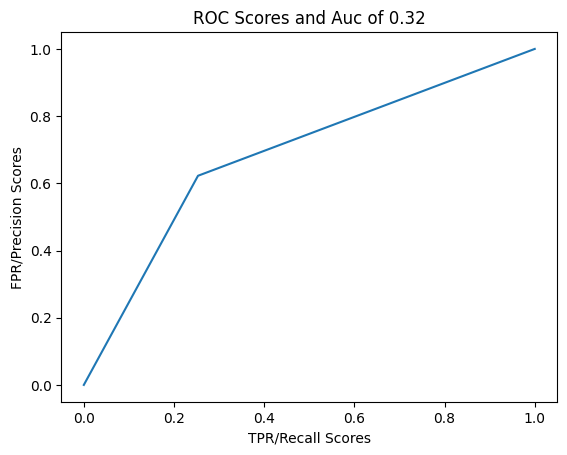

In [26]:
def graph_roc (true_r, est):
    
    fpr, tpr, thresholds = roc_curve(true_r, est)
    auc_ = auc(tpr, fpr)
    plt.plot(fpr,tpr, '-')
    plt.ylabel("FPR/Precision Scores")
    plt.xlabel("TPR/Recall Scores")
    plt.title("ROC Scores and Auc of " + str(round(auc_, 2)))
    plt.show()
    
graph_roc(true_r, est)

In [27]:
precision_average = sum(prec_to_ave)/len(prec_to_ave)
recall_average = sum(rec_to_ave)/len(prec_to_ave)

print("Precision and Recall averages are {0} and {1}, respectively".format(precision_average, recall_average))

Precision and Recall averages are 0.9405253205853745 and 0.6212745175939698, respectively


In [28]:
def user_ave_rating_threshold(df, n):
    ''' Function that averages a unique reviewerID's ratings if they have reviewed more than n books
        and returns a dictionary of threshold values and ids'''
    print(df)
    
    threshold_dict = defaultdict(list)
    
    # note--> to optimize only find the mean if it means the user_Rating_count
    
    user_ratings_ave= df.groupby('user_id')['stars'].mean()
    user_ratings_count = df.groupby('user_id')['stars'].count()
    
    for x in df['user_id'].unique():
        if user_ratings_count[x] > n:
            threshold_dict[x] = user_ratings_ave[x]
        else:
            threshold_dict[x] = 3.5
    
    return(threshold_dict)
            
        
threshold_diction = user_ave_rating_threshold(ratings_data, 8)

                    review_id                 user_id             business_id  \
0      Ad91EzbAGRCR1SwkPfZJKg  LWTvg7RlyNLXIf482tXBPw  WCVFqK84i2H5EClSoow7ZA   
1      uGJubhANtj6sfP_xz8LeLQ  1EecTw-Iojid62ySMMl5gA  xR3inMR2KceU3b9dhkz_tw   
2      xqp0pnO0PfBkaFRNaVImYw  c35f8FumQy5045zFbIir6w  _uyLoz0BbrQIVmUEm_td1Q   
3      91uC4f0aX4ycQTDL5Hq7Mw  huHPQSQgw4kFakc0Vq7TDA  _D7QoWuQKMXk0mEE7r_Ftw   
4      GVoXS_AdNzSUbyNcoErdZQ  rqYkeGG9PBAdMRDvTMCmfw  MVmJuns9ZD9QLGltc0Am8g   
...                       ...                     ...                     ...   
39657  kqWOdqsyp_HnYvtE4C1RaA  2oTodoW6GYioD2CyjjFOGw  edyGVHt_dAR5Dhe6DpuMcQ   
39658  LGTMW0_0W4A0d-xVDrkCMA  iOTfaAVdNPsxkvGNyzNZIQ  4wep1OfeJbpz0DvBsoDdVg   
39659  YdBTG99W3KeCj5tRp_fIBA  rzZp3TElzY35WnY0gkOIjg  3IlvOfSCJSKzjyrpbPKNGQ   
39660  yVfBJpmlgZblJu9jRBBWyw  jtZQYkuCSDNsGtqCTriaxA  NYLtjcCRiJ3YaPXbGfFdAg   
39661  COQx3drndpYnF2x9xj6gZA  30YzC98br4HwZxahLKuZ2w  pO1bjUULFCGIo9O2S28yoA   

       stars          Resta

In [29]:
def precision_recall_at_k(predictions, threshold_dictionary, k=10):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        threshold = threshold_dictionary[uid]

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [30]:
kf = KFold(n_splits=5)
algo = SVD()

for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, threshold_diction, k=5)

    # Precision and recall can then be averaged over all users
  
    prec_to_ave.append(sum(prec for prec in precisions.values()) / len(precisions))
    rec_to_ave.append(sum(rec for rec in recalls.values()) / len(recalls))

In [31]:
precision_average = sum(prec_to_ave)/len(prec_to_ave)
recall_average = sum(rec_to_ave)/len(prec_to_ave)

print("Precision and Recall averages are {0}.2f and {1}.2f, respectively".format(precision_average, recall_average))

Precision and Recall averages are 0.8873408459280346.2f and 0.7217276546155882.2f, respectively


In [32]:
def make_binary_tpr_fpr_user(predictions, threshold_diction):
    
    pred_df = pd.DataFrame(predictions)
    
    pred_df['threshold'] = pred_df['uid'].map(threshold_diction)
    pred_df['r_ui'].where(pred_df['r_ui']>=pred_df['threshold'], 1, inplace=True)
    pred_df['r_ui'].where(pred_df['r_ui']<pred_df['threshold'], 0, inplace=True)
    pred_df['est'].where(pred_df['est']>=pred_df['threshold'], 1, inplace=True)
    pred_df['est'].where(pred_df['est']<pred_df['threshold'], 0, inplace=True)
    
    return pred_df['r_ui'], pred_df['est']

true_r_ut, est_ut = make_binary_tpr_fpr_user(predictions, threshold_diction)

C:\Users\tempadmin\AppData\Local\Temp\ipykernel_19452\3657668503.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pred_df['r_ui'].where(pred_df['r_ui']>=pred_df['threshold'], 1, inplace=True)
C:\Users\tempadmin\AppData\Local\Temp\ipykernel_19452\3657668503.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

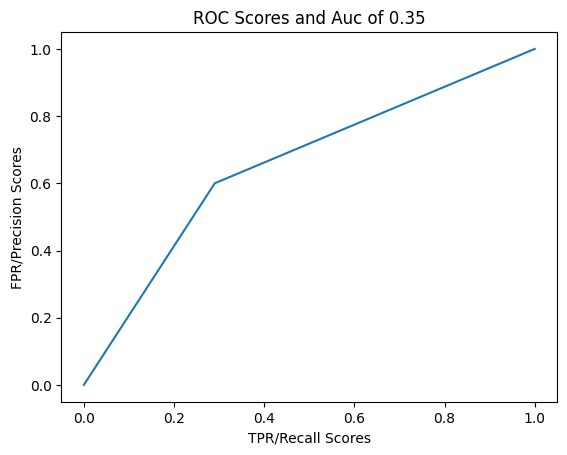

In [33]:
graph_roc(true_r_ut, est_ut)

In [34]:
new_user_id = 'VcLRGCG_VbAo8MxOm76jzA'  
estimated_rating_threshold = 5

new_recommendations = get_recommendations(new_user_id, estimated_rating_threshold)
print(f'\n\nRecommendations are listed below for user {new_user_id}')
print('\n Top 10 Recommended Restaurants')
print(new_recommendations[:10])



Recommendations are listed below for user VcLRGCG_VbAo8MxOm76jzA

 Top 10 Recommended Restaurants
6945353          Triple R's Smokehouse
6945472                  Relleke Farms
6945484           First Stop Bake Shop
6945560    The Weeping Willow Tea Room
6945563     C And C Food For Your Soul
6945601                Sherry's Snacks
6945660    Walton's Ice Cream and More
6945738           Novacich Meat Market
6945792            Nothing Bundt Cakes
6945840               Brickstreet Brew
Name: Restaurant name, dtype: object


In [47]:
import pickle

# Lưu mô hình vào tệp
with open('D:\\Workspace\\Data_Mining\\Restaurant_Recomendation_System\\models\\knn_model.pkl', 'wb') as f:
    pickle.dump(algo, f)

In [48]:
# Tải mô hình từ tệp
with open('D:\\Workspace\\Data_Mining\\Restaurant_Recomendation_System\\models\\knn_model.pkl', 'rb') as f:
    loaded_algo = pickle.load(f)

In [51]:
user_id = 'LWTvg7RlyNLXIf482tXBPw'
business_id = "xR3inMR2KceU3b9dhkz_tw"
prediction = loaded_algo.predict(user_id, business_id)

In [52]:
prediction

Prediction(uid='LWTvg7RlyNLXIf482tXBPw', iid='xR3inMR2KceU3b9dhkz_tw', r_ui=None, est=3.6448997252301685, details={'was_impossible': False})